In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Lagrange interpolation
We can derivate lagrange's interpolation from  a Taylor's  series by exoressing  teh function at $x_1$ nd $x_2$

$$
f(x_1)=f(x)+(x_1-x)f'(x)
$$

$$
f(x_2)=f(x)+(x_2-x)f'(x)\; f(x)=p(x)
$$
$$
p(x)=\frac{x-x_2}{x_1-x_2}f(x_1)+\frac{x-x_1}{x_2-x_1}f(x_2)
$$
then we have two unkwon equation $p(x)$ and $p'(x)$, the p(x) is a linear equiation passing from x_1 to x_2, where $f(x_2)$ is afecte for the rate of $(x-x_1)(x_2-x_1) which is the distance for the point to the start over the allway, it's takes values form 0 to 1 to determinate the importance of $f(x_2)$ for our function.  

We can use more terms of Taylor's series but we need a other point($x_3$) using three points we get that p(x) is a cuadratic function with 3 coefficients $p(x)=ax²+bx+c$ which depent of $x_{1,2,3}$. if you continue adding more  points ypu will obtain the next expression:

$$
p(x)=\sum{^n_{j=1}l_{j,n}(x)f(x_j)},\; where\, n:polynomial\, order
$$
where $f(x)$ is know at the n points $x_j$ and

$$
l_{j,n}(x) = 
\frac{(x - x_1)(x - x_2)\cdots(x - x_{j-1})(x - x_{j+1})\cdots(x - x_n)}
     {(x_j - x_1)(x_j - x_2)\cdots(x_j - x_{j-1})(x_j - x_{j+1})\cdots(x_j - x_n)}
$$

denote that $l_{j,n}(x_i)$ is 1 when i and j are equal and it'll 0 when they are diferent. l function coulbe express like kronecker delta,

$$
l_{j,n}(x_i)=\delta_{i,j}
$$

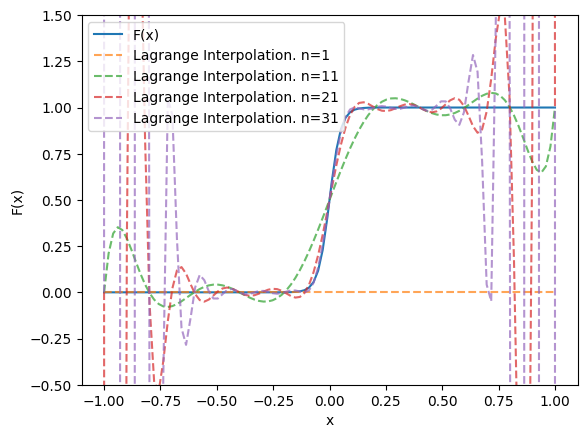

In [3]:
####exercise 1

def F(x):
    alpha=10
    return (1+np.tanh(2*alpha*x))/2
def F_prima(x):
    alpha=10
    return alpha*(1-np.tanh(2*alpha*x)**2)
def lagrange(x,y,n):
    p = 0
    for j in range(n):
        L = 1
        for i in range(n):
            if i!=j:
                L *= (x - y[i]) / (y[j] - y[i])
        p += L*F(y[j])

    return p
x=np.linspace(-1, 1, 100)
plt.plot(x, F(x), label='F(x)')

for n in np.linspace(1,31,4):
    xj=np.linspace(-1,1,int(n))# n values between -1 and 1, you can change this to random values
    
    # xj=np.random.uniform(-1, 1, int(n))  # Random values between -1 and 1 note that this afectes the interpolation is important the points that you choose
    plt.plot(x, [lagrange(i, xj, int(n)) for i in x], linestyle="--",alpha=0.7, label='Lagrange Interpolation. n='+str(int(n)))
plt.xlabel('x')
plt.ylabel('F(x)')
plt.ylim(-0.5, 1.5)
plt.legend()

### Hermite interpolation

In this approximation, the idea is using the derivate of the function to add more terms to the interpolation.
for example, if we knew the function at n points and the derivative at r points, we could construct aa polynomial of order  n+r-1 satisfying the n+r conditions:     


$$


p(x)=\sum_{j=1}^nh_{j,n}(x)f(x_j)+\sum_{j=1}^n\overline{h}_{j,n}f'(x_j)
$$
$$
h_{j,n}=[1-2(x-x_j)l'_{j,n}(x_j)]l²_{j,n}(x)\qquad \overline{h}_{j,n}(x)=(x-x_j)l²_{j,n}(x)
$$


#### Exercise 

evaluate the relative intensity $I/I_0$ and compare to the results of the previous exercise.
$$
I=I_0\left[\frac{2J_1(\rho)}{\rho}\right]²
$$



In [4]:
from scipy.special import jv   # jv = Bessel de primer tipo Jν(x)

def F(x):
    return (2*jv(1,x)/x )**2 # J1(x)
def F_prima(x):
    return 8*jv(1,x)*(x*jv(0,x)-2*jv(2,x))/x**3  # J0(x)-J2(x) /2

def hermite(x,y,n):
    p = 0
    for j in range(n):
        L = 1
        L_prime = 0
        for i in range(n):
            if i != j:
                L *= (x - y[i])/(y[j] - y[i])
                L_prime+=1 /(y[j] - y[i])
                    
        h = (1 - 2*(x - y[j])*L_prime) * (L**2)
        h_bar = (x - y[j])*(L**2)
        # Contribución al polinomio
        p += h * F(y[j]) + h_bar * F_prima(y[j])
    return p


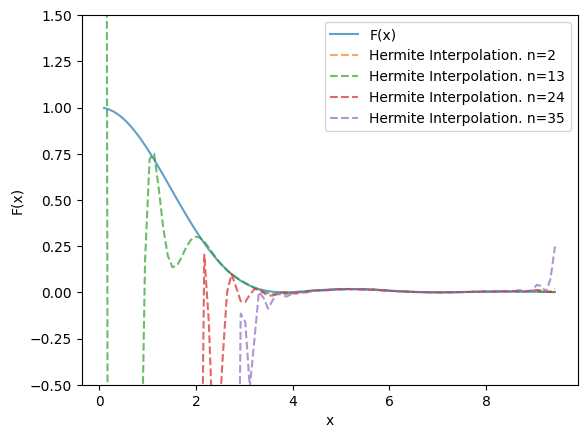

In [9]:
x=np.linspace(0.1,np.pi*3 , 100)
plt.plot(x, F(x), label='F(x)',alpha=0.7)

for n in np.linspace(2,35,4):
    xj=np.linspace(0.01,np.pi*4,int(n))# n values between -1 and 1, you can change this to random values
    #xj=np.random.uniform(0.1, np.pi*3, int(n))  # Random values between -1 and 1 note that this afectes the interpolation is important the points that you choose
    plt.plot(x, [hermite(i, xj, int(n)) for i in x], linestyle="--",alpha=0.7, label='Hermite Interpolation. n='+str(int(n)))
plt.xlabel('x')
plt.ylabel('F(x)')
plt.ylim(-0.5, 1.5)
plt.legend()

### Approximation of derivates
like we know the taylor's series could be a excelent approximation for a derivate becose we can found $f(x+h)$ when h approach to cero. 
$$
f'(x) = \frac{df(x)}{dx} = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h},
$$
$$
f(x+h) = f(x) + h f'(x) + \frac{h^2}{2!} f''(x) + \cdots ,
$$

solve for $f'(x)$ to find

$$
f'(x) = \frac{1}{h} \left[ f(x+h) - f(x) - \frac{h^2}{2!} f''(x) + \cdots \right].
$$

furthermore that aint a approximation, we can take the values $f^{n}(x)*h^n$ like a Error of the approximation, also if h tends to 0 the value of that power will be finite small. To emprove the approx lets make a taylor's series for $f(x+h)-f(x-h)$ as you can se bellow the rest of them reduce some values of $f^{n}(x)*h^n$ when n is even, so only odd values of n contribute to the approx. 

$$
f(x+h) = f(x) + h f'(x) + \frac{h^2}{2!} f''(x) + \frac{h^3}{3!} f^{(3)}(x) + \frac{h^4}{4!} f^{(4)}(x) + \cdots 
$$

$$
f(x-h) = f(x) - h f'(x) + \frac{h^2}{2!} f''(x) - \frac{h^3}{3!} f^{(3)}(x) + \frac{h^4}{4!} f^{(4)}(x) + \cdots $$

$$
f'(x) = \frac{f(x+h) - f(x-h)}{2h} + \mathcal{O}(h^2),
$$
Exercise 3.10

Consider the function $f(x)=xe^x$.Obtain approximation to $f'(2)$ with h=.5,.45,..,.05 using forward backward and central difference.


f'(2)=22.16716829679195
h=0.05. forward=22.9217, backward=21.4434, central=22.1826
h=0.1. forward=23.7084, backward=20.7491, central=22.2288
h=0.15. forward=24.5289, backward=20.083, central=22.3059
h=0.2. forward=25.3846, backward=19.4437, central=22.4142
h=0.25. forward=26.2772, backward=18.8302, central=22.5537
h=0.3. forward=27.2084, backward=18.2413, central=22.7248
h=0.35. forward=28.1799, backward=17.676, central=22.928
h=0.4. forward=29.1938, backward=17.1332, central=23.1635
h=0.45. forward=30.2519, backward=16.6119, central=23.4319
h=0.5. forward=31.3562, backward=16.1112, central=23.7337


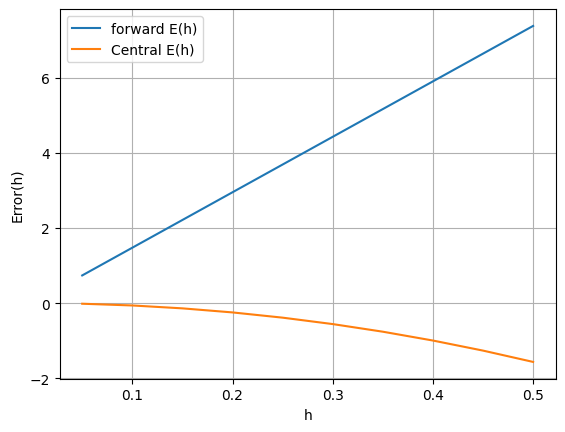

In [6]:
def f(x):
    return x*np.exp(x)
def f_prime(x):
    return np.exp(x)+x*np.exp(x)
def f_prime2(x):
    return np.exp(x)+np.exp(x)+x*np.exp(x)
def f_prime3(x):
    return np.exp(x)+np.exp(x)+np.exp(x)+x*np.exp(x)
def f_prime5(x):
    return 5*np.exp(x)+x*np.exp(x)

def forward(x,h):
    return (f(x+h)-f(x))/h
def backward(x,h):
    return(f(x)-f(x-h))/h
def central(x,h):
    return (f(x+h)-f(x-h))/(2*h)

x_i=2
print(rf"f'({x_i})={f_prime(x_i)}")
x=np.linspace(0,3,100)
hv=np.linspace(0.05,0.5,10)
for i in hv:
    print(rf"h={i.round(2)}. forward={forward(x_i,i).round(4)}, backward={backward(x_i,i).round(4)}, central={central(x_i,i).round(4)}")
plt.plot(hv,hv/2*f_prime2(x_i),label="forward E(h)",)
plt.plot(hv,-hv**2/6*f_prime3(x_i)-hv**4/120*f_prime5(x_i),label="Central E(h)")
plt.ylabel("Error(h)")
plt.xlabel("h")
plt.grid()
plt.legend()

### Richardson extrapolation 
In the previous view we need to series to make the central difference approx, Mr Richard thought thar we caan use just one series but evaluated in to point, like $f(x+h)$ and $f(x+2h)$ and put it together.
$$

f'(x) = \frac{f(x+h) - f(x-h)}{2h} -h²/6f'''(x) \qquad  f''(x) = \frac{f(x+2h) - f(x-2h)}{4h} -4h²/6f'''(x)
$$
As you can see if we twice the step, the error will be four time as large. although we can divide the second equation and subtracting it from the first one. we obtain the next equation.
$$
f'(x) = \frac{f(x-2h)-8f(x-h)+8f(x+h)-f(x-2h)}{12h} -\frac{h⁴}{30}f^{v}(x)
$$


In [7]:
def richardson(x,h):
    return (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h)


f'(2)=22.16716829679195
h=0.05.central=22.1826, richardson=22.1672
h=0.1.central=22.2288, richardson=22.167
h=0.15.central=22.3059, richardson=22.1663
h=0.2.central=22.4142, richardson=22.1644
h=0.25.central=22.5537, richardson=22.1604
h=0.3.central=22.7248, richardson=22.153
h=0.35.central=22.928, richardson=22.1408
h=0.4.central=23.1635, richardson=22.1219
h=0.45.central=23.4319, richardson=22.0942
h=0.5.central=23.7337, richardson=22.0552


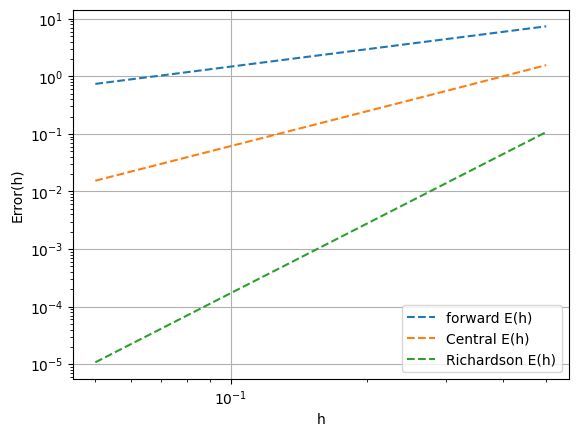

In [12]:
print(rf"f'({x_i})={f_prime(x_i)}")
for i in hv:
    print(rf"h={i.round(2)}.central={central(x_i,i).round(4)}, richardson={richardson(x_i,i).round(4)}")
plt.plot(hv,hv/2*f_prime2(x_i),label="forward E(h)",linestyle="--")
plt.plot(hv,hv**2/6*f_prime3(x_i)+hv**4/120*f_prime5(x_i),label="Central E(h)",linestyle="--")
plt.plot(hv,hv**4/30*f_prime5(x_i),label="Richardson E(h)",linestyle="--")
plt.ylabel("Error(h)")
plt.xlabel("h")
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.legend()

for i in hv:
    print(rf"h={i.round(2)}. forward={forward(x_i,i).round(4)}, backward={backward(x_i,i).round(4)}, central={central(x_i,i).round(4)}")
plt.plot(hv,hv/2*f_prime2(x_i),label="forward E(h)",)
plt.plot(hv,-hv**2/6*f_prime3(x_i)-hv**4/120*f_prime5(x_i),label="Central E(h)")
plt.ylabel("Error(h)")
plt.xlabel("h")
plt.grid()
plt.legend()